In [3]:
import pandas as pd
# Function to load the CSV data with appropriate adjustments for metadata and delimiters
def load_csv(filepath, skiprows=6):
    return pd.read_csv(filepath, skiprows=skiprows, delimiter=',', thousands='\xa0')

# Load the data with the adjustments
data1 = load_csv('data1.csv')
data2 = load_csv('data2.csv')
data3 = load_csv('data3.csv')

# Display the first few rows of each dataset to confirm successful loading
data1_head = data1.head()
data2_head = data2.head()
data3_head = data3.head()

data1_head, data2_head, data3_head


(  Індекс дня Сторінок за сеанс
 0   01.01.23              3,74
 1   02.01.23              3,83
 2   03.01.23              4,24
 3   04.01.23              4,20
 4   05.01.23              4,95,
   Індекс дня Перегляди сторінок
 0   01.01.23              5 128
 1   02.01.23              6 557
 2   03.01.23             11 637
 3   04.01.23             11 159
 4   05.01.23             16 746,
   Індекс дня Нові користувачі
 0   01.01.23            1 025
 1   02.01.23            1 227
 2   03.01.23            1 768
 3   04.01.23            1 736
 4   05.01.23            1 983)

In [4]:
# Function to clean the data
def clean_data(df, date_col, value_col):
    df[date_col] = pd.to_datetime(df[date_col], format='%d.%m.%y')
    df[value_col] = df[value_col].str.replace(',', '.').str.replace('\xa0', '').astype(float)
    df.columns = ['Date', 'Value']
    return df

# Clean each dataset
data1_clean = clean_data(data1, 'Індекс дня', 'Сторінок за сеанс')
data2_clean = clean_data(data2, 'Індекс дня', 'Перегляди сторінок')
data3_clean = clean_data(data3, 'Індекс дня', 'Нові користувачі')

# Display the cleaned data to verify
data1_clean.head(), data2_clean.head(), data3_clean.head()


(        Date  Value
 0 2023-01-01   3.74
 1 2023-01-02   3.83
 2 2023-01-03   4.24
 3 2023-01-04   4.20
 4 2023-01-05   4.95,
         Date    Value
 0 2023-01-01   5128.0
 1 2023-01-02   6557.0
 2 2023-01-03  11637.0
 3 2023-01-04  11159.0
 4 2023-01-05  16746.0,
         Date   Value
 0 2023-01-01  1025.0
 1 2023-01-02  1227.0
 2 2023-01-03  1768.0
 3 2023-01-04  1736.0
 4 2023-01-05  1983.0)

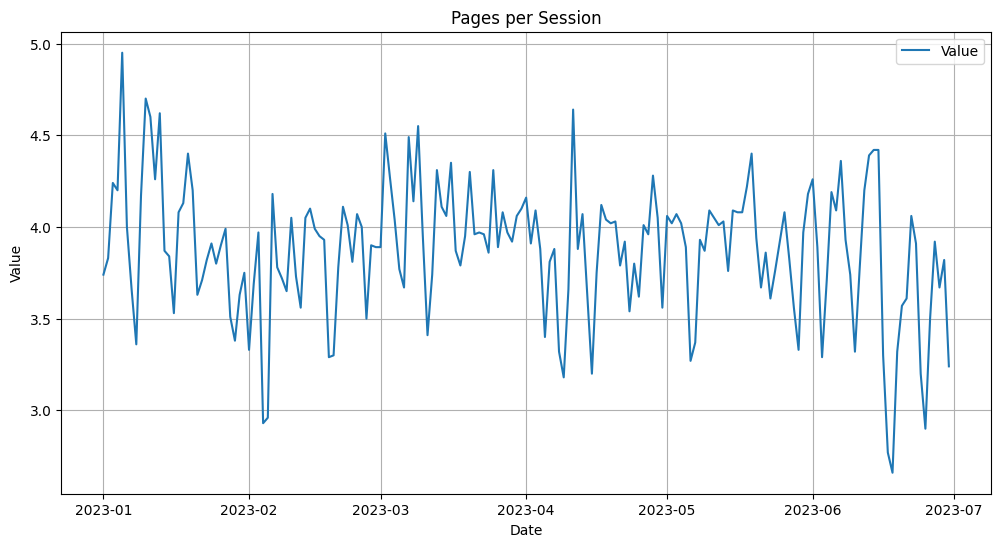

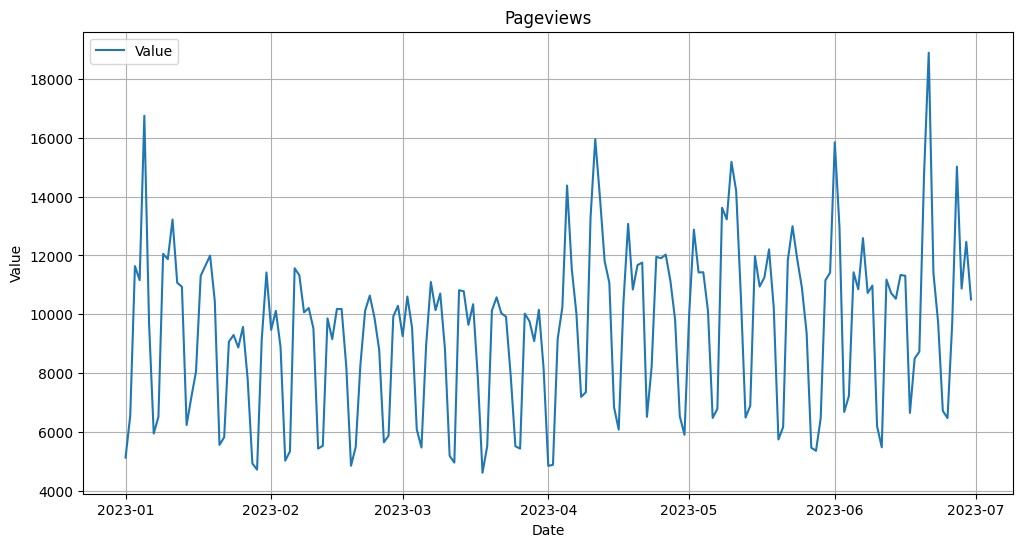

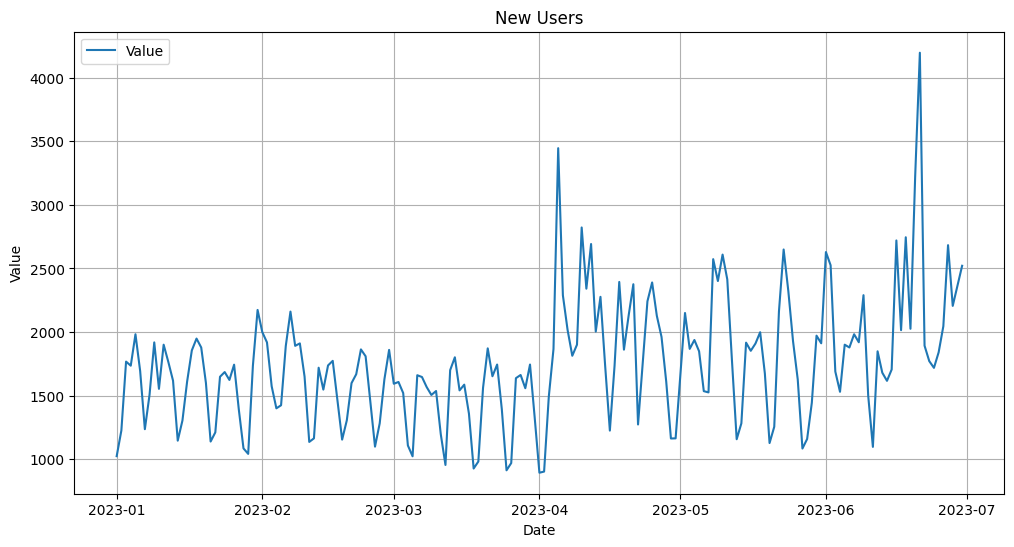

In [5]:
import matplotlib.pyplot as plt

# Function to plot the time series data
def plot_time_series(df, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Value'], label='Value')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each cleaned dataset
plot_time_series(data1_clean, 'Pages per Session')
plot_time_series(data2_clean, 'Pageviews')
plot_time_series(data3_clean, 'New Users')


In [6]:
from scipy import stats

# Function to detect anomalies using Z-score
def detect_anomalies_zscore(df):
    df['Z-Score'] = stats.zscore(df['Value'])
    df['Anomaly'] = df['Z-Score'].abs() > 3
    anomalies = df[df['Anomaly']]
    return anomalies

# Detect anomalies in each dataset
anomalies_data1 = detect_anomalies_zscore(data1_clean)
anomalies_data2 = detect_anomalies_zscore(data2_clean)
anomalies_data3 = detect_anomalies_zscore(data3_clean)

# Display the anomalies
anomalies_data1, anomalies_data2, anomalies_data3


(          Date  Value   Z-Score  Anomaly
 167 2023-06-17   2.77 -3.045633     True
 168 2023-06-18   2.66 -3.348547     True,
     Date      Value    Z-Score  Anomaly
 181  NaT  1723894.0  13.450414     True,
     Date     Value    Z-Score  Anomaly
 181  NaT  317165.0  13.450665     True)

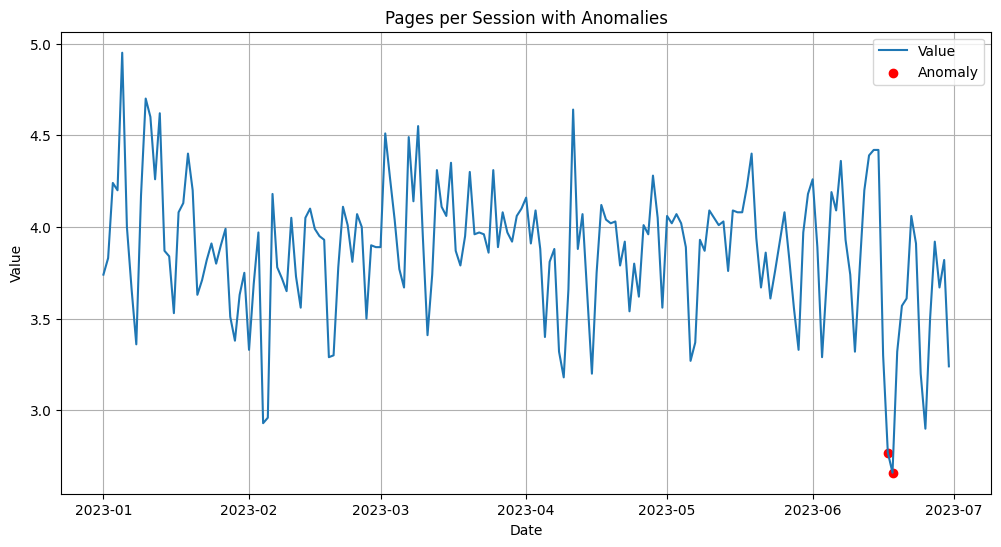

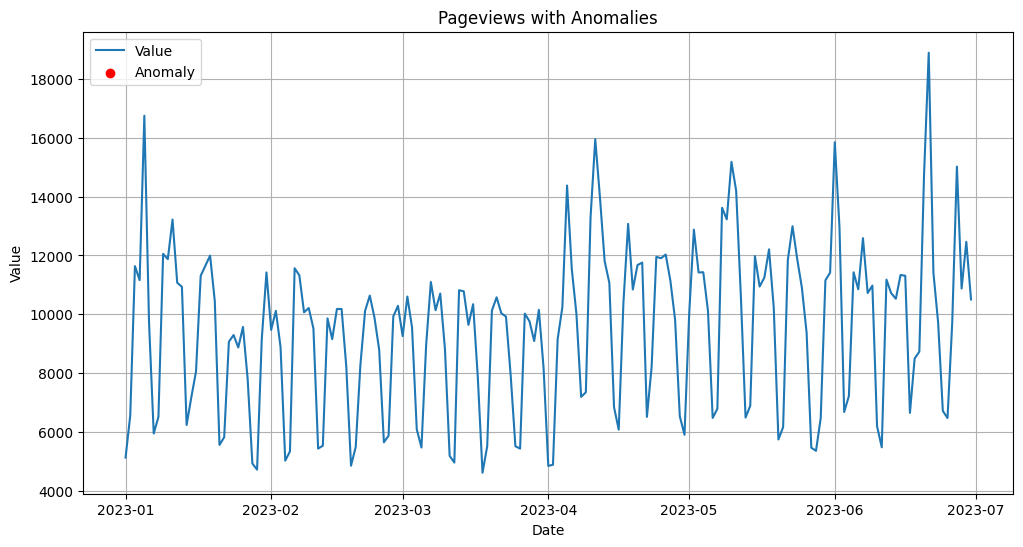

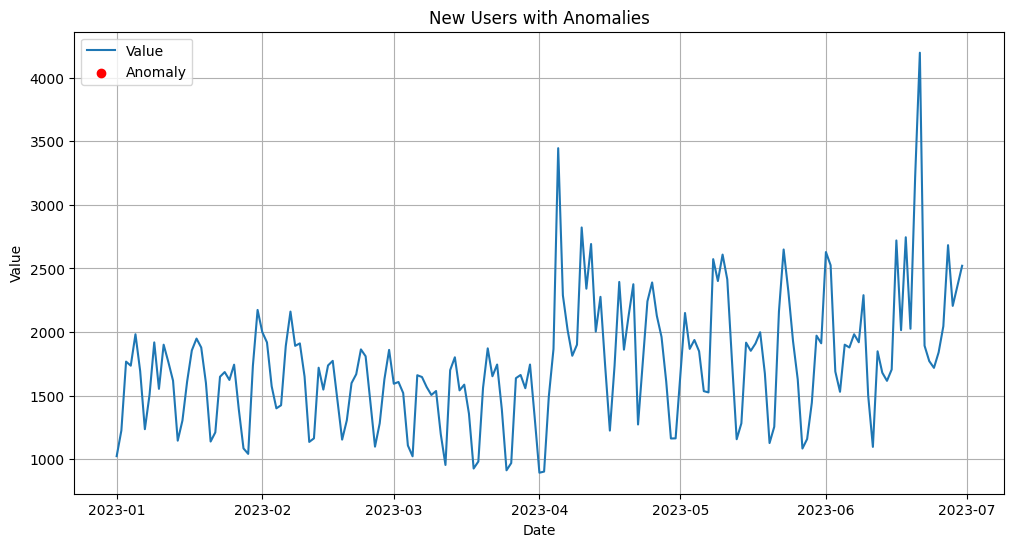

In [7]:
# Function to plot time series with anomalies highlighted
def plot_time_series_with_anomalies(df, anomalies, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Value'], label='Value')
    plt.scatter(anomalies['Date'], anomalies['Value'], color='red', label='Anomaly')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each time series with anomalies highlighted
plot_time_series_with_anomalies(data1_clean, anomalies_data1, 'Pages per Session with Anomalies')
plot_time_series_with_anomalies(data2_clean, anomalies_data2, 'Pageviews with Anomalies')
plot_time_series_with_anomalies(data3_clean, anomalies_data3, 'New Users with Anomalies')


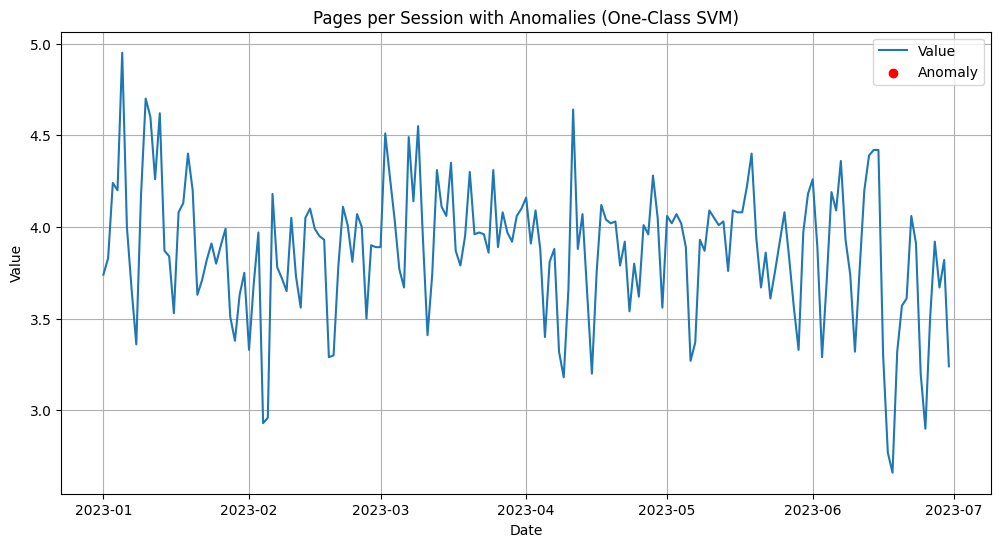

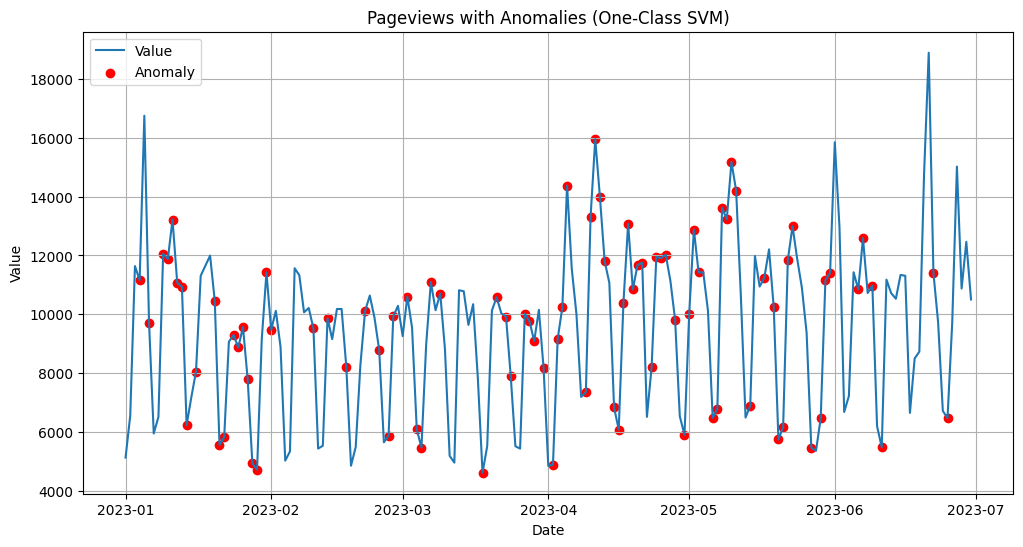

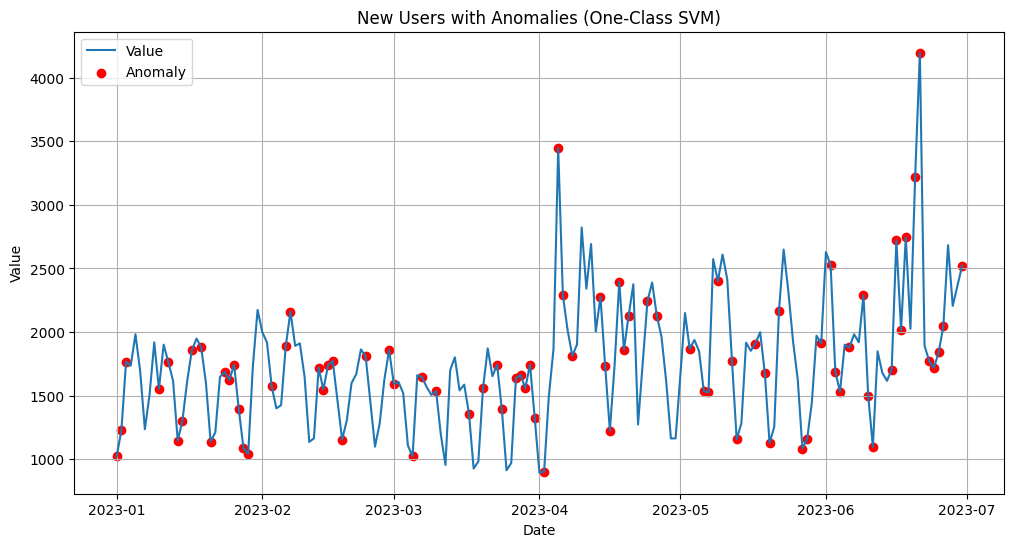

In [8]:
from sklearn.svm import OneClassSVM
import numpy as np

# Function to apply One-Class SVM for anomaly detection
def detect_anomalies_ocsvm(df):
    # Reshape the data for the SVM model
    values = df['Value'].values.reshape(-1, 1)

    # Train the One-Class SVM model
    model = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.01)
    df['Anomaly'] = model.fit_predict(values)

    # Anomalies are indicated by -1
    anomalies = df[df['Anomaly'] == -1]
    return anomalies

# Detect anomalies using One-Class SVM
anomalies_data1_ocsvm = detect_anomalies_ocsvm(data1_clean)
anomalies_data2_ocsvm = detect_anomalies_ocsvm(data2_clean)
anomalies_data3_ocsvm = detect_anomalies_ocsvm(data3_clean)

# Display the anomalies
anomalies_data1_ocsvm, anomalies_data2_ocsvm, anomalies_data3_ocsvm

# Function to plot time series with anomalies highlighted
def plot_time_series_with_anomalies_ocsvm(df, anomalies, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Value'], label='Value')
    plt.scatter(anomalies['Date'], anomalies['Value'], color='red', label='Anomaly')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each time series with anomalies highlighted
plot_time_series_with_anomalies_ocsvm(data1_clean, anomalies_data1_ocsvm, 'Pages per Session with Anomalies (One-Class SVM)')
plot_time_series_with_anomalies_ocsvm(data2_clean, anomalies_data2_ocsvm, 'Pageviews with Anomalies (One-Class SVM)')
plot_time_series_with_anomalies_ocsvm(data3_clean, anomalies_data3_ocsvm, 'New Users with Anomalies (One-Class SVM)')


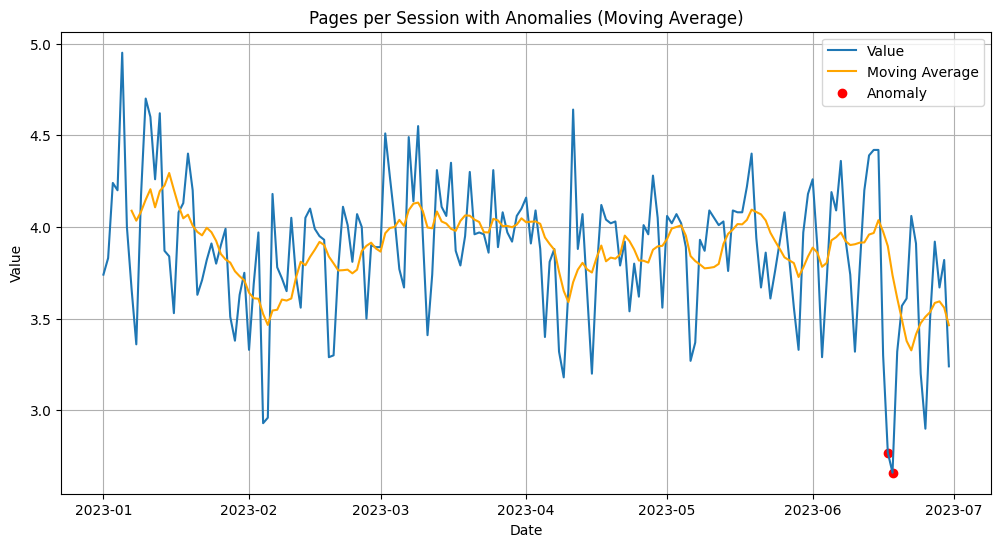

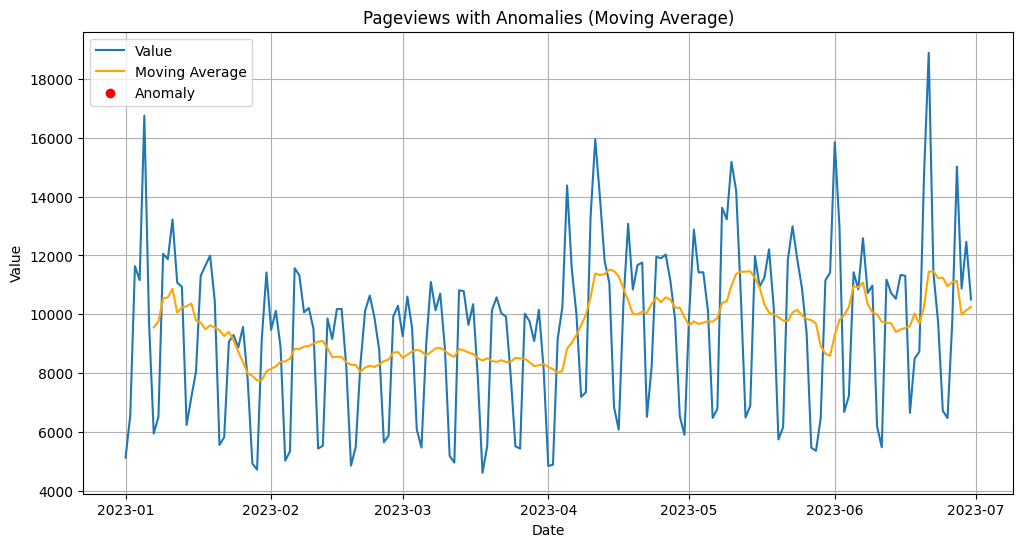

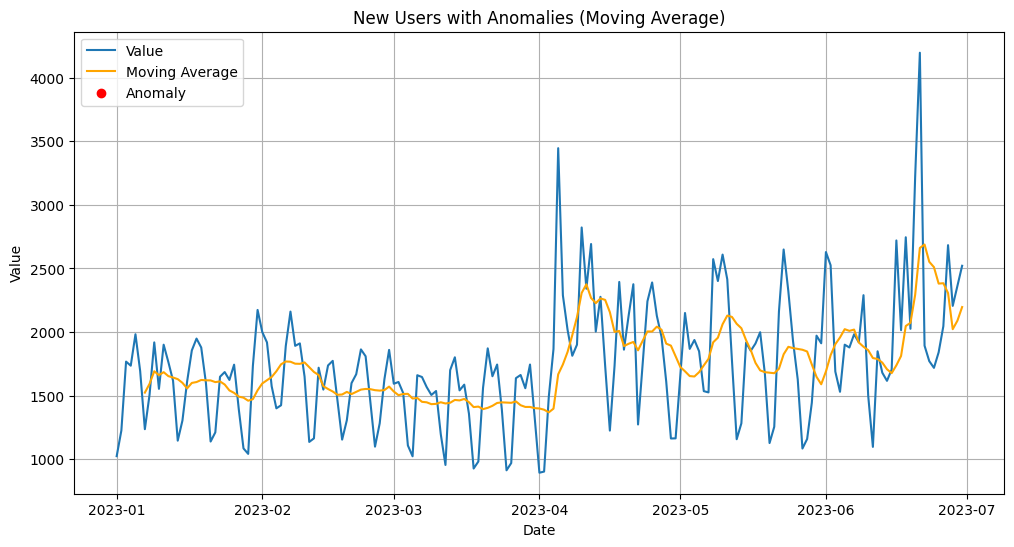

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to detect anomalies using Moving Average
def detect_anomalies_moving_average(df, window=7, threshold=3):
    # Calculate the moving average
    df['Moving_Avg'] = df['Value'].rolling(window=window).mean()

    # Compute the residuals
    df['Residual'] = df['Value'] - df['Moving_Avg']

    # Calculate the standard deviation of the residuals
    residual_std = df['Residual'].std()

    # Identify anomalies
    df['Anomaly'] = df['Residual'].abs() > threshold * residual_std

    # Extract anomalies
    anomalies = df[df['Anomaly']]
    return anomalies

# Detect anomalies using Moving Average
anomalies_data1_ma = detect_anomalies_moving_average(data1_clean)
anomalies_data2_ma = detect_anomalies_moving_average(data2_clean)
anomalies_data3_ma = detect_anomalies_moving_average(data3_clean)

# Function to plot time series with anomalies highlighted
def plot_time_series_with_anomalies_ma(df, anomalies, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Value'], label='Value')
    plt.plot(df['Date'], df['Moving_Avg'], color='orange', label='Moving Average')
    plt.scatter(anomalies['Date'], anomalies['Value'], color='red', label='Anomaly')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each time series with anomalies highlighted
plot_time_series_with_anomalies_ma(data1_clean, anomalies_data1_ma, 'Pages per Session with Anomalies (Moving Average)')
plot_time_series_with_anomalies_ma(data2_clean, anomalies_data2_ma, 'Pageviews with Anomalies (Moving Average)')
plot_time_series_with_anomalies_ma(data3_clean, anomalies_data3_ma, 'New Users with Anomalies (Moving Average)')


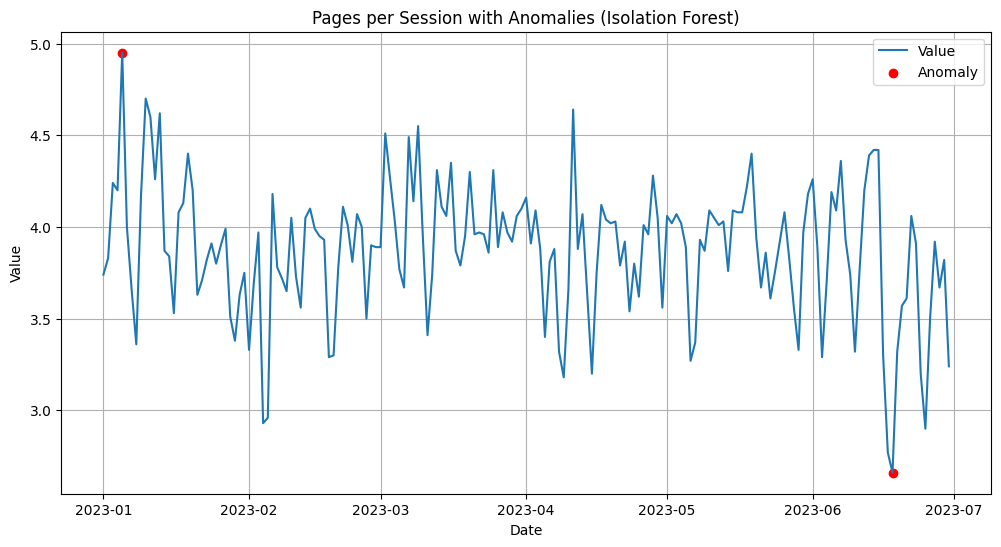

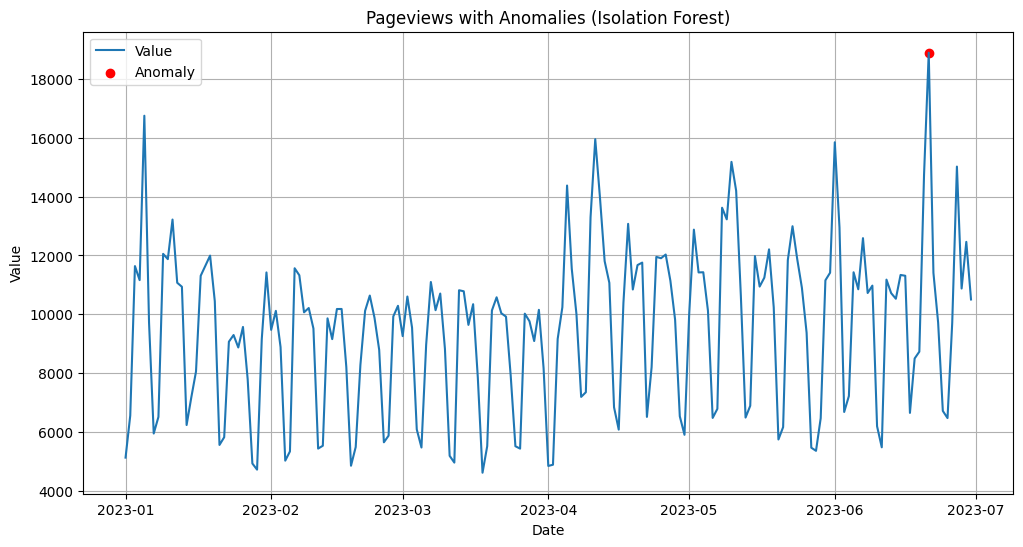

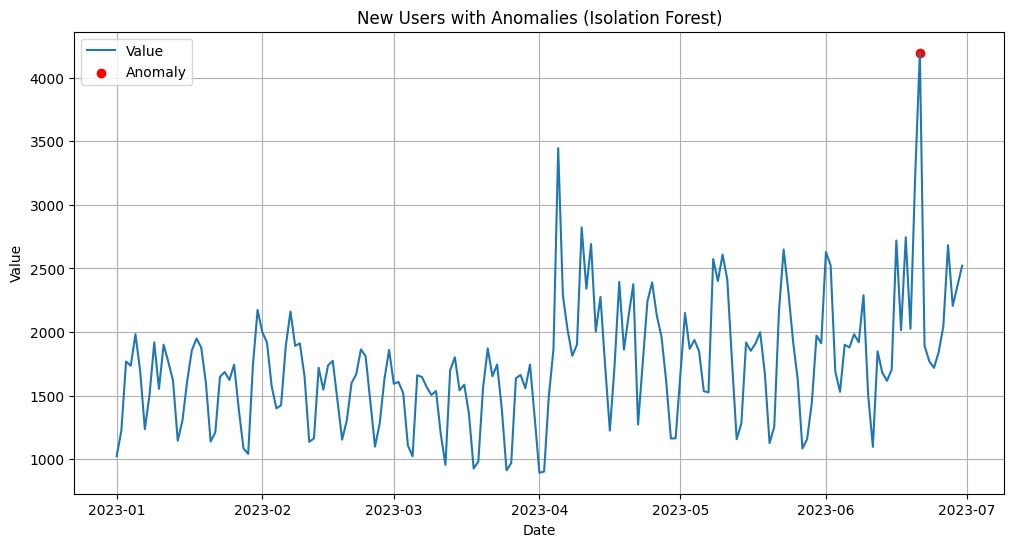

In [10]:
from sklearn.ensemble import IsolationForest

# Function to detect anomalies using Isolation Forest
def detect_anomalies_isolation_forest(df, contamination=0.01):
    # Prepare the data for the Isolation Forest model
    values = df['Value'].values.reshape(-1, 1)

    # Train the Isolation Forest model
    model = IsolationForest(contamination=contamination, random_state=42)
    df['Anomaly'] = model.fit_predict(values)

    # Anomalies are indicated by -1
    anomalies = df[df['Anomaly'] == -1]
    return anomalies

# Detect anomalies using Isolation Forest
anomalies_data1_if = detect_anomalies_isolation_forest(data1_clean)
anomalies_data2_if = detect_anomalies_isolation_forest(data2_clean)
anomalies_data3_if = detect_anomalies_isolation_forest(data3_clean)

# Function to plot time series with anomalies highlighted
def plot_time_series_with_anomalies_if(df, anomalies, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Value'], label='Value')
    plt.scatter(anomalies['Date'], anomalies['Value'], color='red', label='Anomaly')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each time series with anomalies highlighted
plot_time_series_with_anomalies_if(data1_clean, anomalies_data1_if, 'Pages per Session with Anomalies (Isolation Forest)')
plot_time_series_with_anomalies_if(data2_clean, anomalies_data2_if, 'Pageviews with Anomalies (Isolation Forest)')
plot_time_series_with_anomalies_if(data3_clean, anomalies_data3_if, 'New Users with Anomalies (Isolation Forest)')
